# Experiment 1

- We will use this toy dataset

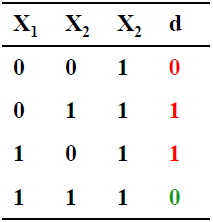

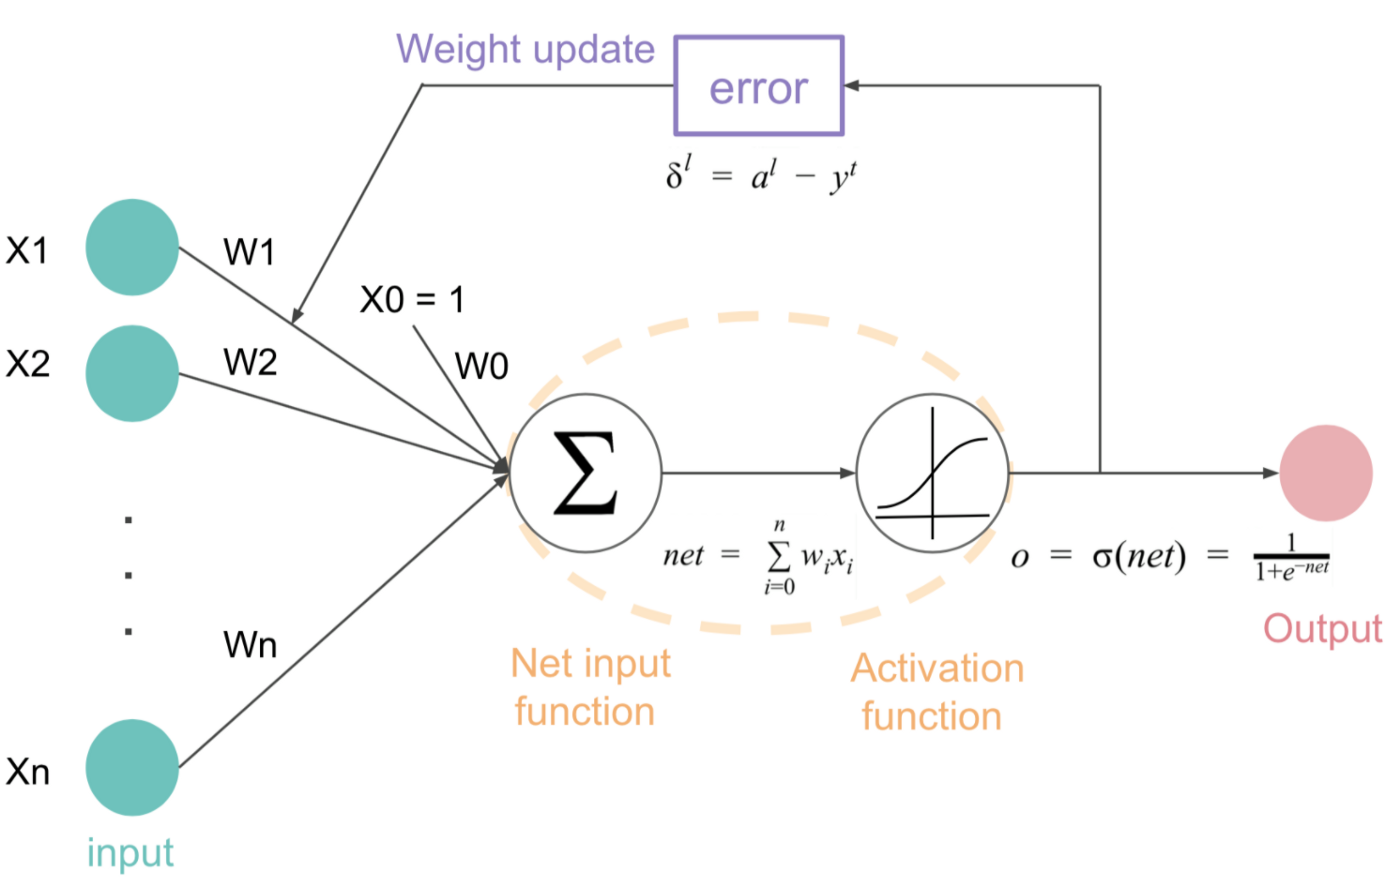

## `i` Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed = 42

In [2]:
class ANN:
    def __init__(self, X, y, learning_rate=0.01):
        self.X = X
        self.y = y
        self.input_shape = X.shape[1]
        self.weights = np.random.rand(self.input_shape, 1)
        self.bias = np.random.rand(1)
        self.learning_rate = learning_rate
        self.loss = []
        self.accuracy = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        s = self.sigmoid(p)
        return s * (1 - s)

    def feedforward(self):
        z = np.dot(self.X, self.weights) + self.bias
        return self.sigmoid(z), z

    def backprop(self):
        m = len(self.y)
        y_hat, z = self.feedforward()

        error = y_hat - self.y
        dz = self.sigmoid_derivative(z)
        z_delta = error * dz

        dw = np.dot(self.X.T, z_delta) / m
        db = np.sum(z_delta) / m

        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

        loss = np.mean(error**2)
        self.loss.append(loss)

        # if y_hat >= 0.5, then 1, else 0
        predictions = (y_hat >= 0.5).astype(int)
        accuracy = np.mean(predictions == self.y)
        self.accuracy.append(accuracy)

        return loss, y_hat

    def fit(self, iterations, verbose=1):
        for i in range(1,iterations+1):
            loss, y_hat = self.backprop()
            if verbose == 1 and i % 200 == 0:
                print(f'Iteration {i}: Loss = {loss:.4f}')
                print(f'Actual: {self.y.flatten()}')
                print(f'Predicted: {y_hat.flatten()}\n')

        return self.loss, self.accuracy
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        pred = self.sigmoid(z)
        return (pred >= 0.5).astype(int)

## `ii` Testing

In [3]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [4]:
model = ANN(X, y, learning_rate=0.2)
history = model.fit(iterations=2000, verbose=1)

Iteration 200: Loss = 0.0799
Actual: [0. 1. 1. 0.]
Predicted: [0.30230009 0.7358169  0.73816504 0.29975116]

Iteration 400: Loss = 0.0439
Actual: [0. 1. 1. 0.]
Predicted: [0.22881072 0.79773449 0.81016818 0.2151854 ]

Iteration 600: Loss = 0.0290
Actual: [0. 1. 1. 0.]
Predicted: [0.18779331 0.83363063 0.84747591 0.17253413]

Iteration 800: Loss = 0.0212
Actual: [0. 1. 1. 0.]
Predicted: [0.16149938 0.85676122 0.87023643 0.14660025]

Iteration 1000: Loss = 0.0166
Actual: [0. 1. 1. 0.]
Predicted: [0.14310041 0.87298297 0.88571051 0.12899941]

Iteration 1200: Loss = 0.0135
Actual: [0. 1. 1. 0.]
Predicted: [0.12942089 0.88505961 0.89700963 0.11616297]

Iteration 1400: Loss = 0.0114
Actual: [0. 1. 1. 0.]
Predicted: [0.11879383 0.89445002 0.90568272 0.10631925]

Iteration 1600: Loss = 0.0098
Actual: [0. 1. 1. 0.]
Predicted: [0.11026089 0.90199526 0.9125887  0.09848732]

Iteration 1800: Loss = 0.0086
Actual: [0. 1. 1. 0.]
Predicted: [0.10323142 0.90821457 0.91824358 0.09207855]

Iteration 2000

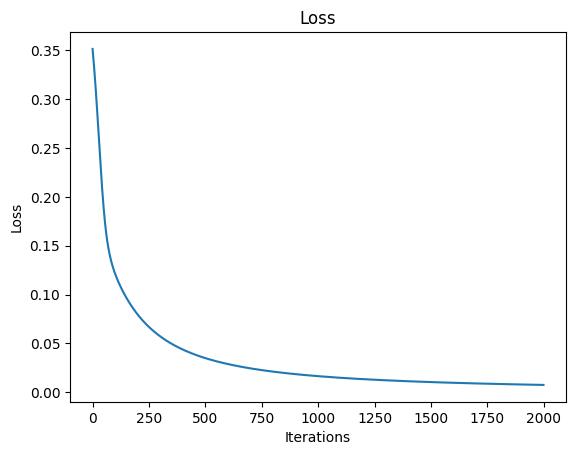

In [5]:
plt.plot(history[0])
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

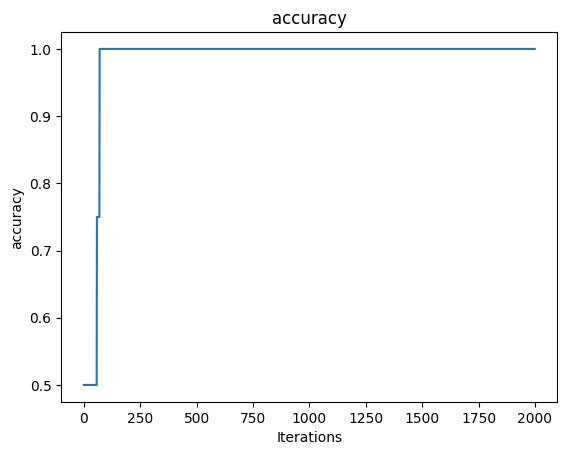

In [6]:
plt.plot(history[1])
plt.title('accuracy')
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()

In [7]:
pred = model.predict(X)
print('Predictions:', pred.flatten())
print('Actual:', y.flatten())

Predictions: [0 1 1 0]
Actual: [0. 1. 1. 0.]


----

# Experiment 2

- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test the approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

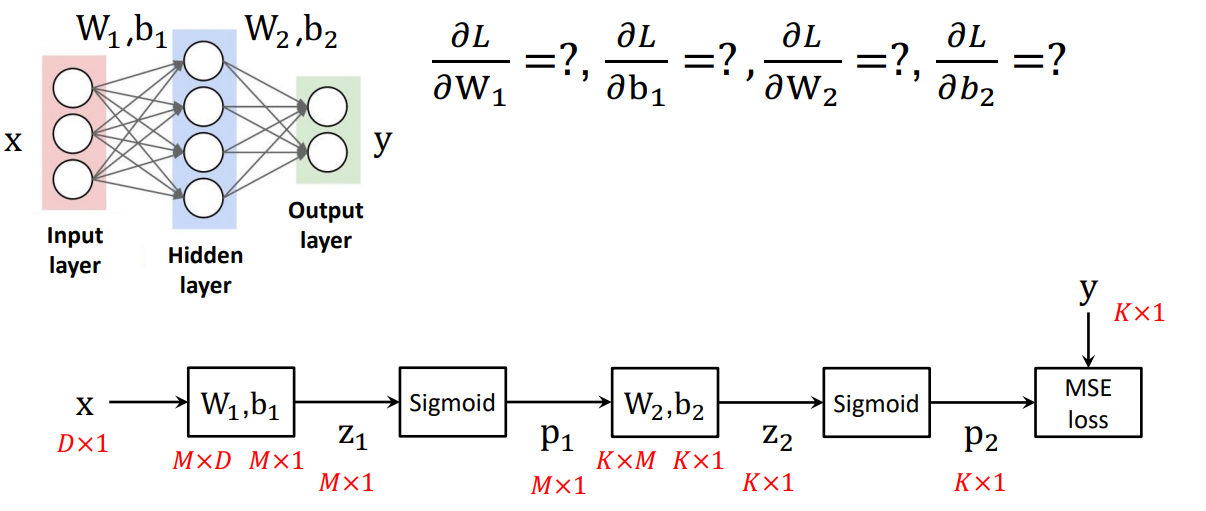

## `i` Implementation

In [8]:
class ANN:
    def __init__(self, X, y, num_hidden_nodes, learning_rate = 0.01):
        self.X = X
        self.y = y
        self.input_shape = X.shape[1]
        self.w1 = np.random.rand(self.input_shape, num_hidden_nodes)
        self.b1 = np.random.rand(num_hidden_nodes)
        self.w2 = np.random.rand(num_hidden_nodes, 1)
        self.b2 = np.random.rand(1)
        self.learning_rate = learning_rate
        self.loss = []
        self.accuracy = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        s = self.sigmoid(p)
        return s * (1 - s)

    def feedforward(self):
        z1 = np.dot(self.X, self.w1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.w2) + self.b2
        return self.sigmoid(z2), z1, a1, z2


    def backprop(self):
        m = len(self.y)
        y_hat, z1, a1, z2 = self.feedforward()

        error = y_hat - self.y
        dz2 = self.sigmoid_derivative(z2)
        z2_delta = error * dz2

        dw2 = np.dot(a1.T, z2_delta) / m
        db2 = np.sum(z2_delta) / m

        da1 = np.dot(z2_delta, self.w2.T)
        dz1 = self.sigmoid_derivative(z1)
        z1_delta = da1 * dz1

        dw1 = np.dot(self.X.T, z1_delta) / m
        db1 = np.sum(z1_delta) / m

        self.w1 -= self.learning_rate * dw1
        self.b1 -= self.learning_rate * db1
        self.w2 -= self.learning_rate * dw2
        self.b2 -= self.learning_rate * db2

        loss = np.mean(error**2)
        self.loss.append(loss)        

        # if y_hat >= 0.5, then 1, else 0
        predictions = (y_hat >= 0.5).astype(int)
        accuracy = np.mean(predictions == self.y)
        self.accuracy.append(accuracy)

        return loss, y_hat

    def fit(self, iterations, verbose=1):
        for i in range(1,iterations+1):
            loss, y_hat = self.backprop()
            if verbose == 1 and i % 200 == 0:
                print(f'Iteration {i}: Loss = {loss:.4f}')
                print(f'Actual: {self.y.flatten()}')
                print(f'Predicted: {y_hat.flatten()}\n')

        return self.loss, self.accuracy
    
    def predict(self, X):
        z1 = np.dot(X, self.w1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.w2) + self.b2
        pred = self.sigmoid(z2)
        return (pred >= 0.5).astype(int)

## `ii` Testing

In [9]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [10]:
model = ANN(X, y, num_hidden_nodes=10, learning_rate=0.2)
history = model.fit(iterations=2000, verbose=1)

Iteration 200: Loss = 0.2354
Actual: [0. 1. 1. 0.]
Predicted: [0.54501267 0.57845816 0.58196926 0.54057455]

Iteration 400: Loss = 0.2068
Actual: [0. 1. 1. 0.]
Predicted: [0.49096767 0.57450736 0.58375546 0.48164141]

Iteration 600: Loss = 0.1589
Actual: [0. 1. 1. 0.]
Predicted: [0.43807584 0.62447827 0.64353218 0.41924836]

Iteration 800: Loss = 0.1035
Actual: [0. 1. 1. 0.]
Predicted: [0.36283403 0.69343581 0.72193308 0.33344209]

Iteration 1000: Loss = 0.0627
Actual: [0. 1. 1. 0.]
Predicted: [0.28991779 0.75943823 0.79052099 0.25524077]

Iteration 1200: Loss = 0.0393
Actual: [0. 1. 1. 0.]
Predicted: [0.23415248 0.80892899 0.8380885  0.19896149]

Iteration 1400: Loss = 0.0264
Actual: [0. 1. 1. 0.]
Predicted: [0.19476594 0.84320896 0.86933559 0.16111154]

Iteration 1600: Loss = 0.0189
Actual: [0. 1. 1. 0.]
Predicted: [0.16682856 0.86712597 0.89041479 0.13523114]

Iteration 1800: Loss = 0.0144
Actual: [0. 1. 1. 0.]
Predicted: [0.14638944 0.88438762 0.90530118 0.11681332]

Iteration 2000

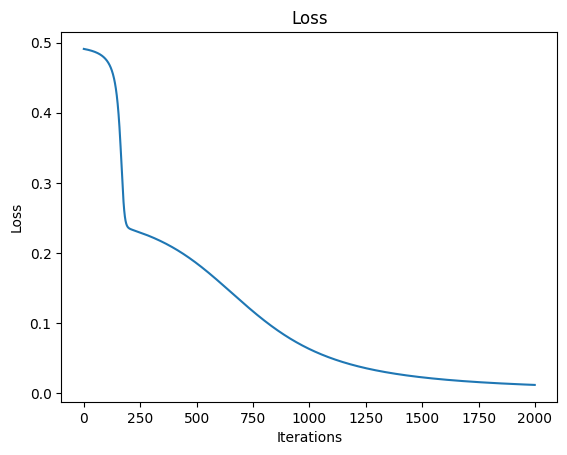

In [11]:
plt.plot(history[0])
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [12]:
for i in range(251):
    if i % 10 == 0:
        print(f'Iteration {i}: Loss = {history[0][i]:.4f}')

Iteration 0: Loss = 0.4912
Iteration 10: Loss = 0.4906
Iteration 20: Loss = 0.4898
Iteration 30: Loss = 0.4890
Iteration 40: Loss = 0.4880
Iteration 50: Loss = 0.4868
Iteration 60: Loss = 0.4854
Iteration 70: Loss = 0.4837
Iteration 80: Loss = 0.4816
Iteration 90: Loss = 0.4789
Iteration 100: Loss = 0.4754
Iteration 110: Loss = 0.4706
Iteration 120: Loss = 0.4640
Iteration 130: Loss = 0.4542
Iteration 140: Loss = 0.4387
Iteration 150: Loss = 0.4129
Iteration 160: Loss = 0.3690
Iteration 170: Loss = 0.3064
Iteration 180: Loss = 0.2574
Iteration 190: Loss = 0.2397
Iteration 200: Loss = 0.2352
Iteration 210: Loss = 0.2335
Iteration 220: Loss = 0.2323
Iteration 230: Loss = 0.2312
Iteration 240: Loss = 0.2301
Iteration 250: Loss = 0.2290


There is a big loss step from iteration 150 to 180

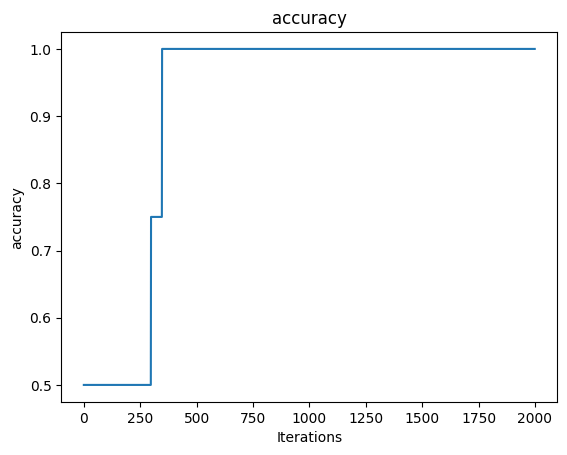

In [14]:
plt.plot(history[1])
plt.title('accuracy')
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.show()

---

# # Experiment 3

- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [15]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Input

np.random.seed = 42

In [16]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

print('X:', X.shape)
print('y:', y.shape)

X: (768, 8)
y: (768,)


## `i` Shallow network


In [19]:
model = Sequential({})
model.add(Input(shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
768/32

24.0

In [21]:
batch_size = X.shape[0] // 32
history = model.fit(X, y, epochs=150, batch_size=batch_size,shuffle=True,validation_split=0.2 , verbose=1)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6388 - loss: 12.0501 - val_accuracy: 0.6623 - val_loss: 3.6043
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6016 - loss: 2.6643 - val_accuracy: 0.5325 - val_loss: 2.4396
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5222 - loss: 2.6456 - val_accuracy: 0.6039 - val_loss: 2.0279
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6038 - loss: 1.9163 - val_accuracy: 0.6039 - val_loss: 1.7497
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5692 - loss: 1.8903 - val_accuracy: 0.6169 - val_loss: 1.5145
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6019 - loss: 1.6399 - val_accuracy: 0.6623 - val_loss: 1.3031
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5970 - loss: 1.5916 - val_accuracy: 0.6364 - val_loss: 1.1770
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6262 - loss: 1.1697 - val_accuracy: 0.5714 -

In [22]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

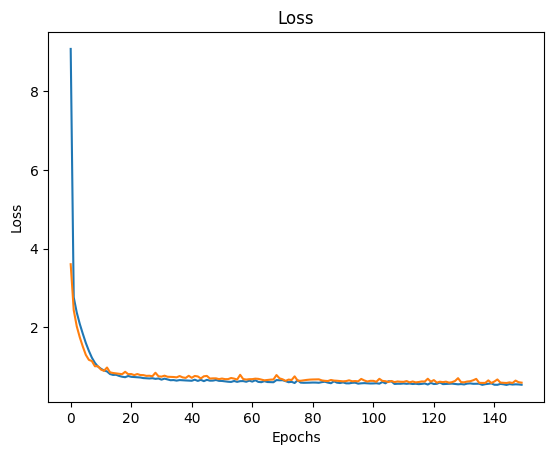

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

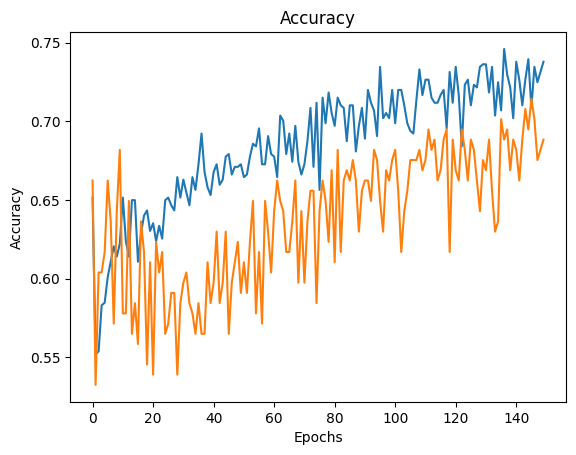

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## `ii` Deep network


In [25]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X, y, epochs=150, batch_size=batch_size, shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3954 - loss: 1.6919 - val_accuracy: 0.4026 - val_loss: 1.0327
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4079 - loss: 0.9862 - val_accuracy: 0.5714 - val_loss: 0.8568
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5755 - loss: 0.7823 - val_accuracy: 0.5779 - val_loss: 0.7455
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5950 - loss: 0.6784 - val_accuracy: 0.6299 - val_loss: 0.7259
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6550 - loss: 0.6381 - val_accuracy: 0.5779 - val_loss: 0.6810
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6670 - loss: 0.6175 - val_accuracy: 0.6429 - val_loss: 0.6764
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6506 - loss: 0.6198 - val_accuracy: 0.6234 - val_loss: 0.6616
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6748 - loss: 0.6077 - val_accuracy: 0.6299 - 

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

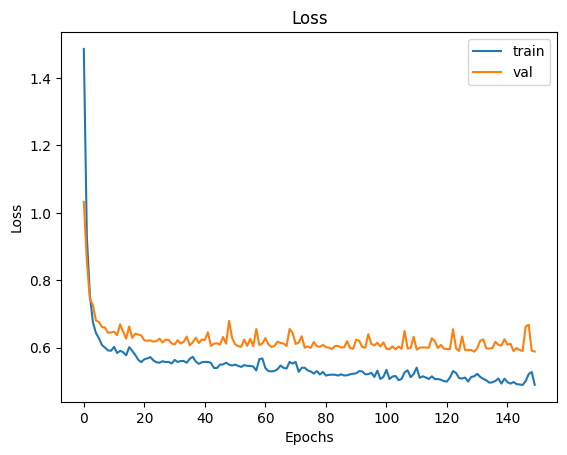

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

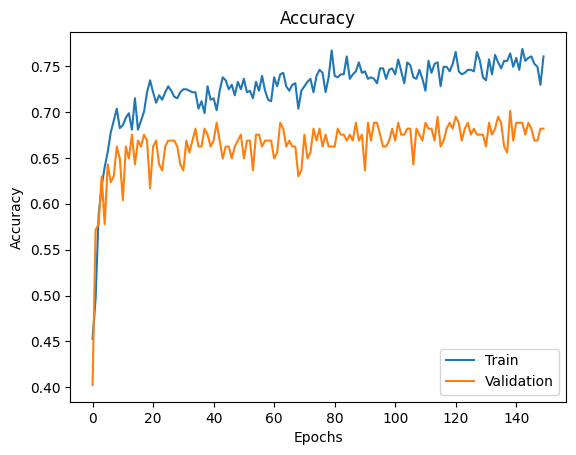

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

## `iii` Deeper network


In [30]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083 (4.23 KB)

 Trainable params: 1,083 (4.23 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(X, y, epochs=150, batch_size=batch_size, shuffle=True, validation_split=0.2, verbose=1)

Epoch 1/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6587 - loss: 4.9864 - val_accuracy: 0.6429 - val_loss: 1.1169
Epoch 2/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6549 - loss: 0.9710 - val_accuracy: 0.5909 - val_loss: 0.7890
Epoch 3/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6052 - loss: 0.7078 - val_accuracy: 0.6039 - val_loss: 0.7318
Epoch 4/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.6898 - val_accuracy: 0.6429 - val_loss: 0.6910
Epoch 5/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6558 - loss: 0.7174 - val_accuracy: 0.6364 - val_loss: 0.7134
Epoch 6/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6423 - loss: 0.6850 - val_accuracy: 0.6364 - val_loss: 0.7035
Epoch 7/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6742 - loss: 0.6418 - val_accuracy: 0.6429 - val_loss: 0.6873
Epoch 8/150
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 0.6379 - val_accuracy: 0.6364 - 

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

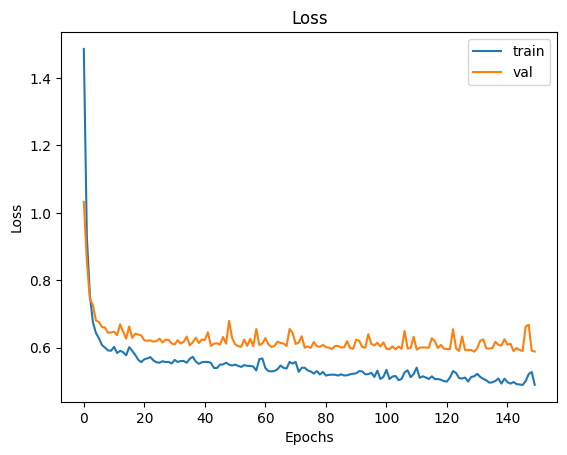

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()


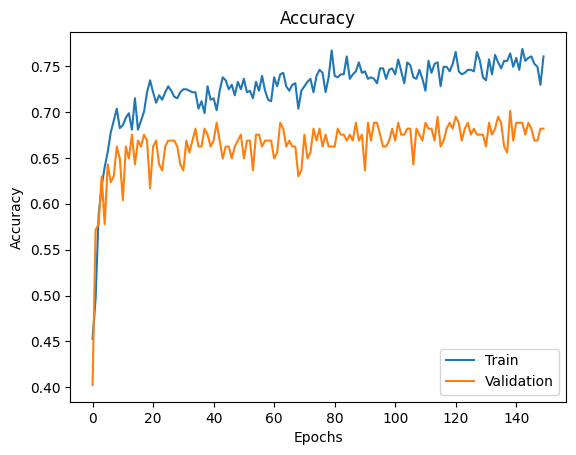

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

### Deep models (more complex) are overfitting because the data is too simple for them